In [6]:
from numpy import cumsum, random
import matplotlib.pyplot as plt

from Objects import TF_object
from scipy.signal import TransferFunction
from numpy_utils import converters
from Controllers import PID_controller
import Plotters as sim_plt

In [4]:
# Two nominal inputs, two outputs, two disturbances inputs (3,4)
tf11 = TransferFunction([5, 3], [3.5, 1.7, 1])
tf12 = TransferFunction([-1], [2.5, 1])
tf13 = TransferFunction([5, 1], [3.5, 1])
tf14 = TransferFunction([1], [3.5, 1])

tf21 = TransferFunction([1], [10, 0])
tf22 = TransferFunction([1], [16.25, 1])
tf23 = TransferFunction([10, 3], [4, 1])
tf24 = TransferFunction([1], [2, 2.25, 6])

tf = [
    [tf11, tf12, tf13, tf14],
    [tf21, tf22, tf23, tf24]
]
tf_mat = converters.to_array_converter().convert_any_type(tf)

obj = TF_object(tf_matrix=tf_mat, sampling_time=0.1)

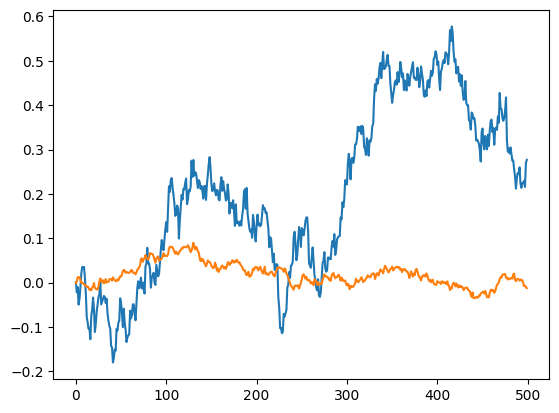

In [38]:
random.seed(2137)
dist1 = random.normal(0, 0.025, 500)
dist1 = cumsum(dist1)

dist2 = random.normal(0, 0.005, 500)
dist2 = cumsum(dist2)

plt.plot(dist1)
plt.plot(dist2)

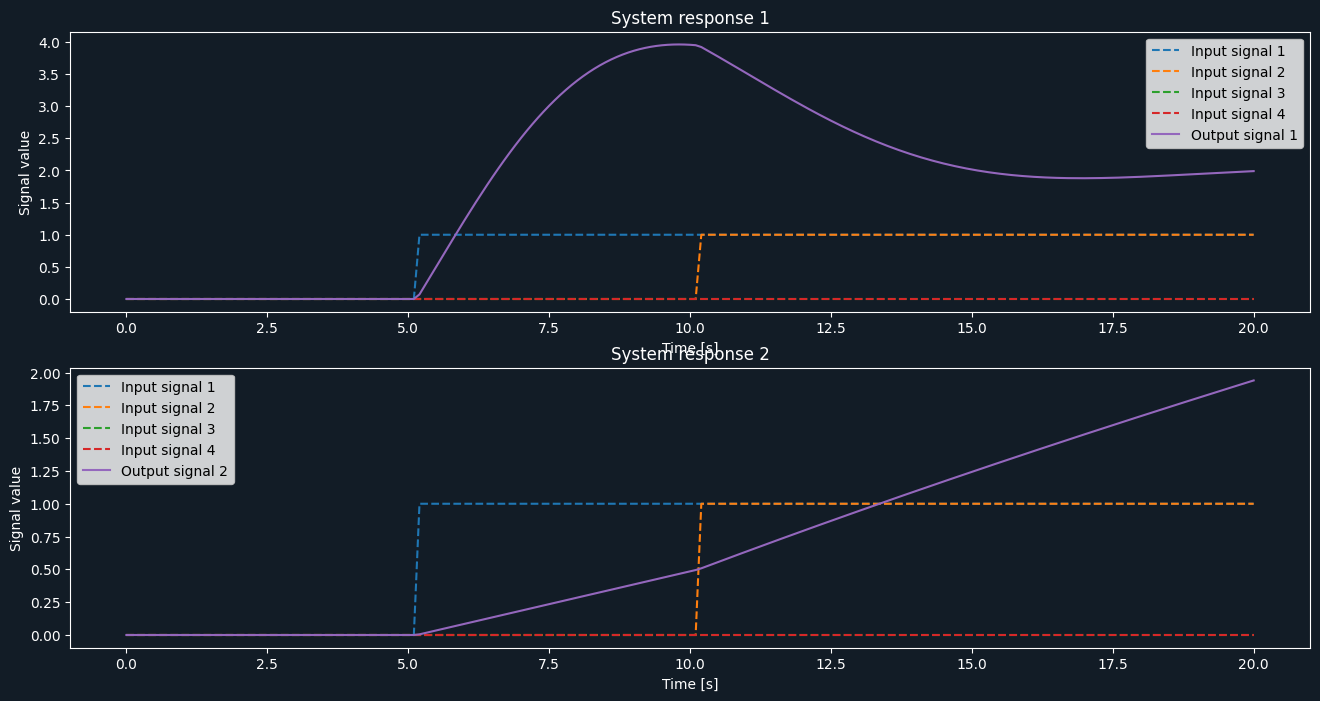

In [48]:
obj.reset_history()

for t in range(0, 200):
    u1 = 0 if t < 51 else 1
    u2 = 0 if t < 101 else 1

    u = converters.to_vector_converter().convert_any_type([u1, u2, 0, 0])
    obj.simulate_step(u)

sim_plt.plot_object_history(obj, figsize=(16, 8))

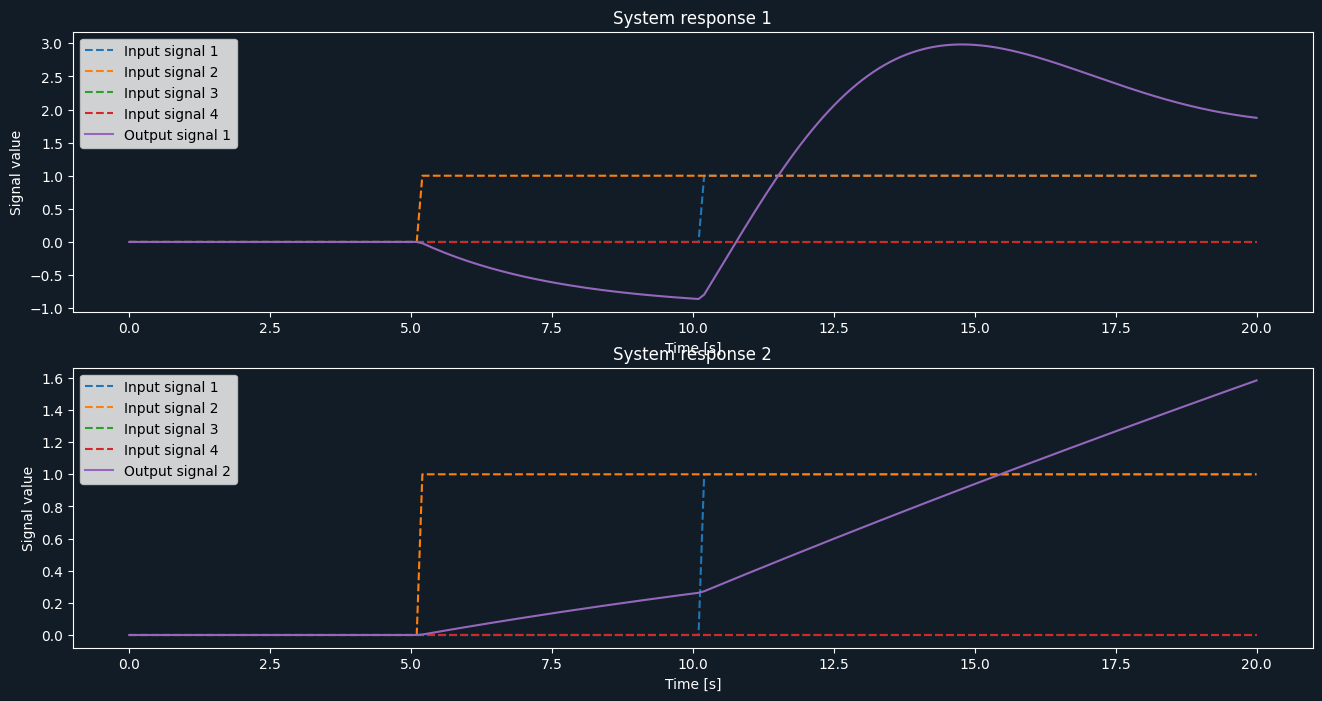

In [49]:
obj.reset_history()

for t in range(0, 200):
    u1 = 0 if t < 101 else 1
    u2 = 0 if t < 51 else 1

    u = converters.to_vector_converter().convert_any_type([u1, u2, 0, 0])
    obj.simulate_step(u)

sim_plt.plot_object_history(obj, figsize=(16, 8))

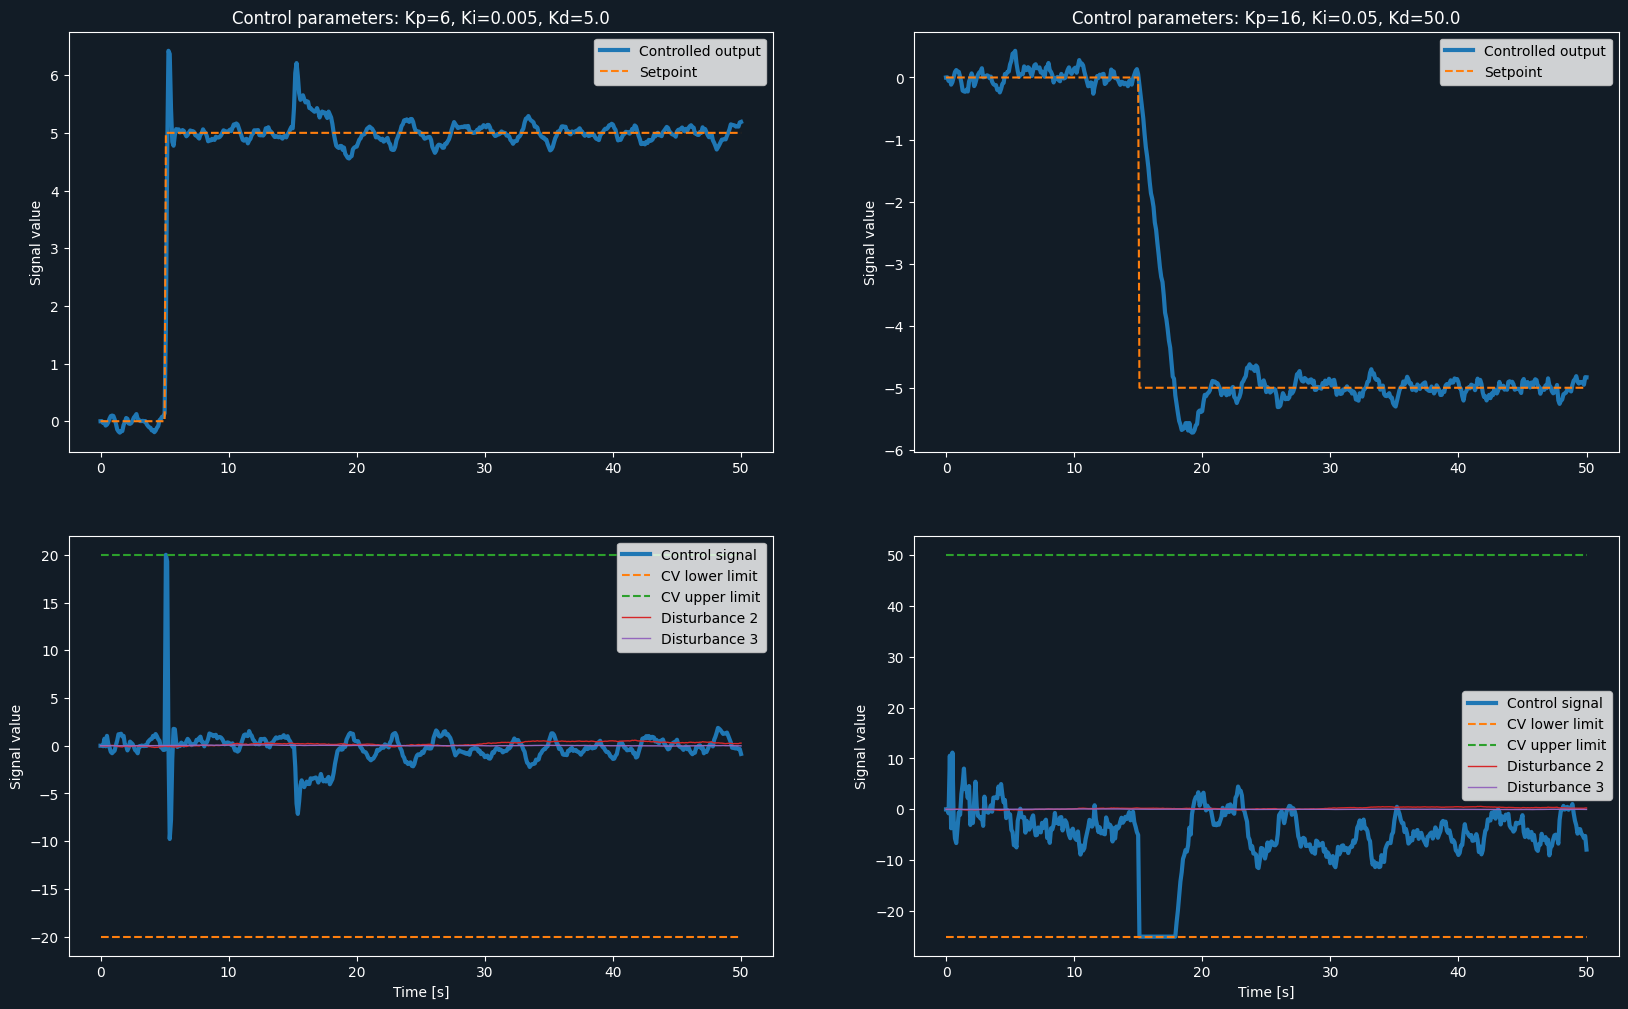

In [50]:
Kp1 = 6
Ki1 = 5e-3
Kd1 = 5e0
pid1 = PID_controller(Kp1, Ki1, Kd1, setpoint=0, sample_time=0.1)
pid1.set_CV_limit(-20, 20)

Kp2 = 16
Ki2 = 5e-2
Kd2 = 5e1
pid2 = PID_controller(Kp2, Ki2, Kd2, setpoint=0, sample_time=0.1)
pid2.set_CV_limit(-25, 50)

obj.reset_history()
for t in range(0, 500):
    if t == 50:
        pid1.set_setpoint(5) 
    elif t == 150:
        pid2.set_setpoint(-5)
    
    d1 = dist1[t]
    d2 = dist2[t]

    pv1 = obj.get_output_hist()[-1][0][0]
    pv2 = obj.get_output_hist()[-1][1][0]
    cv1 = pid1.simulate_step(pv1)
    cv2 = pid2.simulate_step(pv2)
    u = converters.to_vector_converter().convert_any_type([cv1, cv2, d1, d2])

    obj.simulate_step(u)

cm = {
    0 : [0, pid1],
    1 : [1, pid2]
}
sim_plt.plot_regulation_history(obj, cm, figsize=(20, 12))